# Matplotlib学习

【matplotlib官网】[Matplotlib: Python plotting - Matplotlib 3.4.3 documentation](https://matplotlib.org)

## 模块引入

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## 基础用法

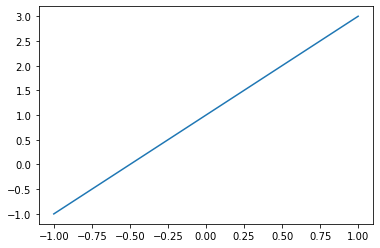

In [6]:
x = np.linspace(-1, 1, 50)
y = 2 * x + 1
z = x ** 2 + 1

plt.figure()
plt.plot(x, y)
plt.show()

### figure

一个figure-show对之间的plot会被画在一起

- num: 编号
- figsize：大小

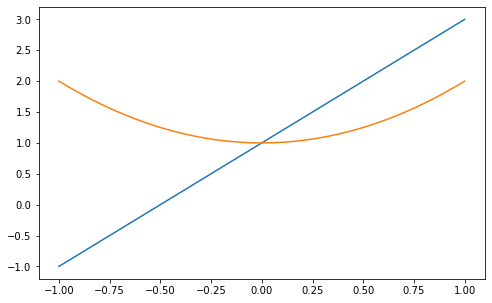

In [7]:
plt.figure(num=3, figsize=(8, 5))
plt.plot(x, y)
plt.plot(x, z)
plt.show()

### 坐标轴

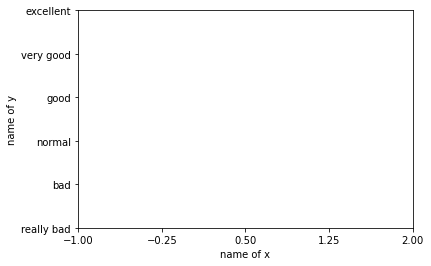

In [11]:
# 区间范围
plt.xlim((-1, 2))
plt.ylim((-2, 3))

# 坐标轴名称
plt.xlabel("name of x")
plt.ylabel("name of y")

# 刻度
plt.xticks(np.linspace(-1, 2, 5))
plt.yticks([-2, -1, 0, 1, 2, 3], ['really bad', 'bad', 'normal', 'good', 'very good', 'excellent'])

plt.show()

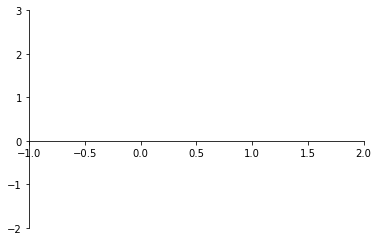

In [20]:
plt.figure()
plt.xlim((-1, 2))
plt.ylim((-2, 3))

# 获取当前坐标轴信息
ax = plt.gca()

# 设置边框颜色
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# 设置边框位置, 让x轴在y=0的位置
ax.spines['bottom'].set_position(('data', 0))   # outward | axes | data

# 设置刻度显示位置
ax.xaxis.set_ticks_position('bottom')   # top | bottom | both | none

plt.show()

### legend图例

- loc: best

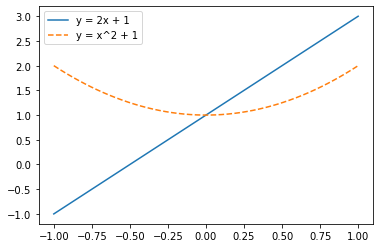

In [24]:
x = np.linspace(-1, 1, 50)
y1 = 2 * x + 1
y2 = x ** 2 + 1

plt.figure()
l1,  = plt.plot(x, y1, label='y = 2x + 1')      # 返回值是列表，注意 “，”
l2,  = plt.plot(x, y2, label='y = x^2 + 1', linestyle='--')
plt.legend(loc='upper left')

# 将返回值保存下来后可以重新设置label
# plt.legend(handles=[l1, l2], labels=['first', 'second'], loc='best')

plt.show()

### Annotation 标注

- xy: 标注点的位置
- xycoords: 基于什么选择位置
- xytext, textcoords: 标注位置的描述
- arrowprops: 箭头类型的设置

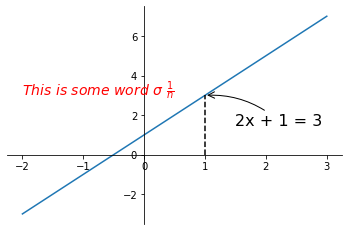

In [37]:
x = np.linspace(-2, 3, 50)
y = 2 * x + 1

plt.figure()
plt.plot(x, y)

ax = plt.gca()
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# 虚线
x0 = 1
y0 = 2 * x0 + 1
plt.plot([x0, x0], [0, y0], 'k--')

# 标注
plt.annotate(r'2x + 1 = %s' % y0,
                xy=(x0, y0), xycoords='data', 
                xytext=(+30, -30), textcoords='offset points', fontsize=16,
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3, rad=.2'))

# 文字
plt.text(-2, 3, 
            r'$This\ is\ some\ word\ \sigma\ \frac{1}{n} $',
            fontdict={'size': 14, 'color': 'r'})

plt.show()

## 绘图

### Scatter 散点图

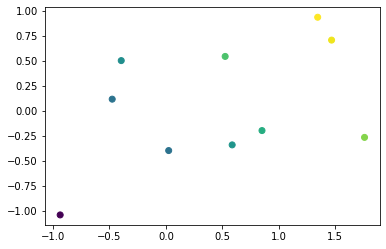

In [40]:
n = 10
x = np.random.normal(0, 1, n)
y = np.random.normal(0, 1, n)
value = x + y

plt.scatter(x, y, c=value)   # c: color value

### Bar 柱状图

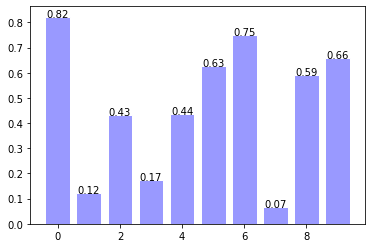

In [47]:
n = 10
x = np.arange(n)
y = np.random.uniform(0, 1, n)

plt.bar(x, y, facecolor='#9999ff', edgecolor='white')

for x_, y_ in zip(x, y):
    plt.text(x_, y_+0.01, '%.2f' % y_, ha='center', va='center')

### Contours 等高线图

<a list of 8 text.Text objects>

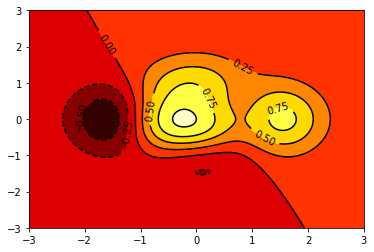

In [61]:
def f(x, y):
    return (1 - x/2 + x**5 + y**3) * np.exp(-x**2 - y**2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X, Y = np.meshgrid(x, y)

# 颜色填充
plt.contourf(X, Y, f(X, Y), cmap=plt.cm.hot)    # cmap: 颜色组

# 等高线绘制
C = plt.contour(X, Y, f(X, Y), colors='black')

# 文字
plt.clabel(C, inline=True)

### ColorBar

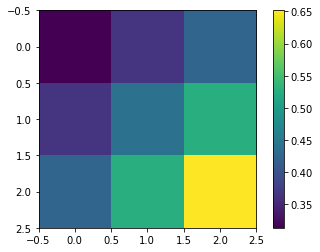

In [68]:
a = np.array([0.313660827978, 0.365348418405, 0.423733120134,
              0.365348418405, 0.439599930621, 0.525083754405,
              0.423733120134, 0.525083754405, 0.651536351379]).reshape(3,3)
plt.imshow(a)
plt.colorbar()

### 3D

In [1]:
# 3D坐标轴显示
from mpl_toolkits.mplot3d import Axes3D

/Users/doublez/opt/anaconda3/envs/cv/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


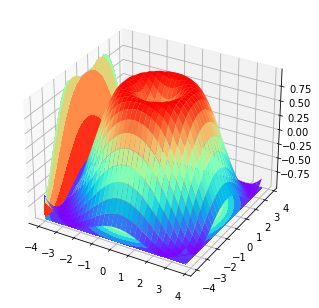

In [6]:
fig = plt.figure()
ax = Axes3D(fig)

x = np.arange(-4, 4, 0.25)
y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

ax.plot_surface(X, Y, Z, cmap=plt.get_cmap('rainbow'))

# 投影/等高线
ax.contourf(X, Y, Z, zdir='z', offset=-1, cmap=plt.get_cmap('rainbow'))
ax.contourf(X, Y, Z, zdir='x', offset=-4, cmap=plt.get_cmap('rainbow'))

## Subplot

### 均匀划分

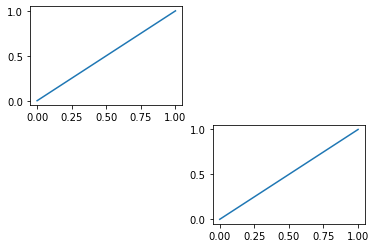

In [7]:
plt.figure()
plt.subplot(2, 2, 1)
plt.plot([0, 1], [0, 1])

plt.subplot(224)            # 简写
plt.plot([0, 1], [0, 1])

### 不均匀划分

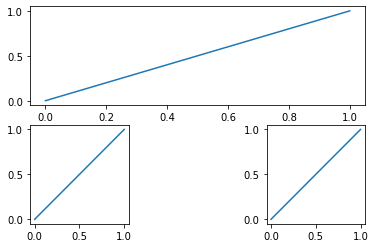

In [8]:
plt.figure()

plt.subplot(2, 1, 1)    # 先将区域划分成2行3列
plt.plot([0, 1], [0, 1])

plt.subplot(2, 3, 4)    # 再将区域划分成2行3列，此时第一张图就占三个位置了，因此从4继续
plt.plot([0, 1], [0, 1])

plt.subplot(236)
plt.plot([0, 1], [0, 1])

### 更复杂的分割

subplot2grid: 
- 第一个参数表示整个窗口的划分
- 第二个参数表示从哪里开始
- colspan：列的跨度
- rowspan：行的跨度
> 跨度默认为1

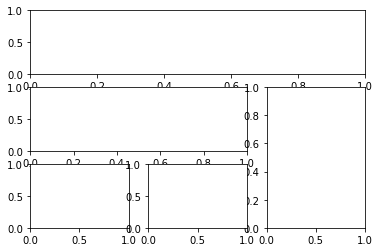

In [9]:
plt.figure()

ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax4 = plt.subplot2grid((3, 3), (2, 0))
ax5 = plt.subplot2grid((3, 3), (2, 1))

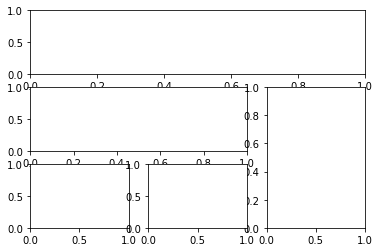

In [13]:
import matplotlib.gridspec as gridspec

plt.figure()
gs = gridspec.GridSpec(3, 3)

ax1 = plt.subplot(gs[0, :])
ax2 = plt.subplot(gs[1, :2])
ax3 = plt.subplot(gs[1:, 2])
ax4 = plt.subplot(gs[-1, 0])
ax5 = plt.subplot(gs[-1, -2])

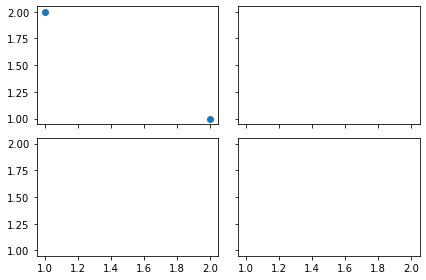

In [15]:
f, ((ax11, ax12), (ax13, ax14)) = plt.subplots(2, 2, sharex=True, sharey=True)
ax11.scatter([1, 2], [2, 1])
plt.tight_layout()  # 紧凑显示
# plt.show()

> 还有「图中图」、「次坐标系」、「动画」等省略

## 动态数据

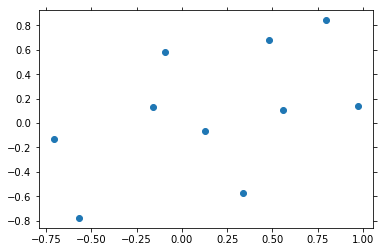

In [26]:
from IPython import display

plt.ion()

for _ in range(10):
    x = np.random.uniform(-1, 1, 10)
    y = np.random.uniform(-1, 1, 10)

    plt.cla()
    display.clear_output(wait=True)
    plt.scatter(x, y)
    plt.pause(0.1)
plt.ioff()